In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
elec=pd.read_excel('Training Set.xls')

In [5]:
elec.head()

,DATE,TOTAL Load,AVGTEMP,AVGHUM,HOL_IND,SUNRISE,SUNSET
0,2004-01-01 00:30:00,253080.0,68.0,55,1,1900-01-02 07:01:00,1900-01-01 18:22:00
1,2004-01-01 01:00:00,250560.0,68.0,55,1,1900-01-02 07:01:00,1900-01-01 18:22:00
2,2004-01-01 01:30:00,248400.0,68.0,55,1,1900-01-02 07:01:00,1900-01-01 18:22:00
3,2004-01-01 02:00:00,245880.0,68.0,55,1,1900-01-02 07:01:00,1900-01-01 18:22:00
4,2004-01-01 02:30:00,244720.0,68.0,55,1,1900-01-02 07:01:00,1900-01-01 18:22:00


In [6]:
elec.describe()

,TOTAL Load,AVGTEMP,AVGHUM,HOL_IND
count,48190.000000,48142.000000,48190.000000,48190.000000
mean,333667.336277,80.974118,61.555426,0.086657
std,73189.520139,5.907768,17.491679,0.281335
min,18960.000000,63.000000,16.000000,0.000000
25%,282260.000000,78.000000,49.000000,0.000000
50%,331620.000000,82.000000,63.000000,0.000000
75%,395000.000000,85.000000,76.000000,0.000000
max,480100.000000,94.000000,98.000000,1.000000


In [7]:
elec.columns

Index(['DATE', 'TOTAL Load', 'AVGTEMP', 'AVGHUM', 'HOL_IND', 'SUNRISE',
       'SUNSET'],
      dtype='object')

# EDA

In [56]:
elec.corr()

,TOTAL Load,AVGTEMP,AVGHUM,HOL_IND,Minute,Day,Hour,Month,Year,DATEYear,...,DATEDay,DATEDayofweek,DATEDayofyear,DATEIs_month_end,DATEIs_month_start,DATEIs_quarter_end,DATEIs_quarter_start,DATEIs_year_end,DATEIs_year_start,DATEElapsed
TOTAL Load,1.000000,0.172644,0.083776,-0.201051,-0.001561,0.055847,4.460461e-01,-0.049071,0.045009,0.045009,...,0.055847,-0.139378,-0.044988,0.013012,-0.009700,3.490707e-02,0.014458,2.935445e-03,-0.021085,0.029742
AVGTEMP,0.172644,1.000000,0.297904,-0.038878,-0.000014,0.010692,3.760697e-05,0.160142,0.074567,0.074567,...,0.010692,-0.019845,0.156908,0.011813,-0.012928,-7.592212e-03,-0.031625,-6.790837e-02,-0.107214,0.129169
AVGHUM,0.083776,0.297904,1.000000,-0.026176,0.000020,-0.019140,3.519195e-05,0.332168,0.087353,0.087353,...,-0.019140,-0.018595,0.327185,-0.000917,0.007579,2.085250e-02,0.014650,1.350769e-02,-0.006596,0.201356
HOL_IND,-0.201051,-0.038878,-0.026176,1.000000,-0.000013,-0.019491,-2.770232e-06,0.002218,0.009285,0.009285,...,-0.019491,0.055833,0.000770,-0.016244,0.080208,2.299365e-03,0.068321,6.398779e-02,0.175757,0.009556
Minute,-0.001561,-0.000014,0.000020,-0.000013,1.000000,-0.000046,-8.993925e-06,-0.000058,-0.000021,-0.000021,...,-0.000046,0.000010,-0.000061,-0.000008,0.000109,-4.368214e-06,0.000195,-1.854228e-06,0.000379,-0.000007
Day,0.055847,0.010692,-0.019140,-0.019491,-0.000046,1.000000,-4.402212e-05,0.009803,-0.003433,-0.003433,...,1.000000,-0.006011,0.096606,0.308101,-0.308478,1.762632e-01,-0.176004,7.759098e-02,-0.091315,0.030262
Hour,0.446046,0.000038,0.000035,-0.000003,-0.000009,-0.000044,1.000000e+00,-0.000022,-0.000042,-0.000042,...,-0.000044,-0.000013,-0.000025,-0.000002,0.000192,-9.465904e-07,0.000331,-4.018106e-07,0.000633,0.000944
Month,-0.049071,0.160142,0.332168,0.002218,-0.000058,0.009803,-2.162569e-05,1.000000,-0.169567,-0.169567,...,0.009803,-0.000641,0.996193,-0.001163,-0.000983,3.119082e-02,-0.032240,7.961910e-02,-0.084400,0.178066
Year,0.045009,0.074567,0.087353,0.009285,-0.000021,-0.003433,-4.245680e-05,-0.169567,1.000000,1.000000,...,-0.003433,-0.000455,-0.172738,0.000396,0.000530,2.262714e-04,0.000455,-2.296987e-02,0.006858,0.939112
DATEYear,0.045009,0.074567,0.087353,0.009285,-0.000021,-0.003433,-4.245680e-05,-0.169567,1.000000,1.000000,...,-0.003433,-0.000455,-0.172738,0.000396,0.000530,2.262714e-04,0.000455,-2.296987e-02,0.006858,0.939112


C:\Users\sparsh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sparsh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


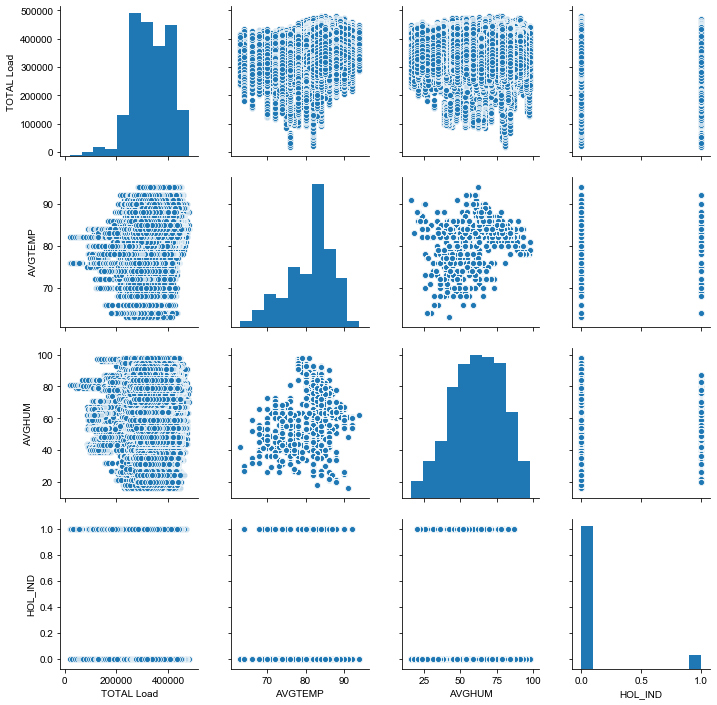

In [8]:
sns.pairplot(elec,kind='scatter',palette='magma')
sns.set_style(style="darkgrid")

In [9]:
elec['DATE'].iloc[0]

Timestamp('2004-01-01 00:30:00')

In [10]:
elec['DATE'] = pd.to_datetime(elec['DATE'])

In [11]:
elec['Minute'] =elec['DATE'].apply(lambda time: time.minute)
elec['Day'] = elec['DATE'].apply(lambda time: time.day)
elec['Hour'] =elec['DATE'].apply(lambda time: time.hour)
elec['Month'] = elec['DATE'].apply(lambda time: time.month)
elec['Year'] = elec['DATE'].apply(lambda time: time.year)
elec['Day of Week'] = elec['DATE'].apply(lambda time: time.dayofweek)

In [12]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#assumed days

In [13]:
elec['Day of Week'] = elec['Day of Week'].map(dmap)

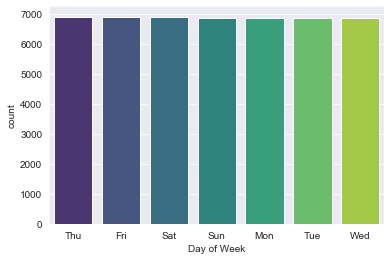

In [14]:
sns.countplot(x='Day of Week',data=elec,palette='viridis')

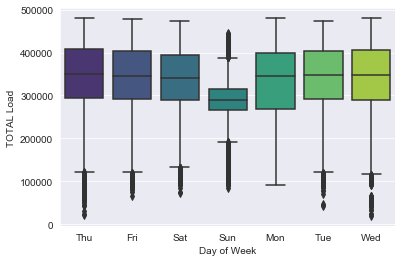

In [15]:
sns.boxplot(x='Day of Week',y='TOTAL Load',data=elec,palette='viridis')

<Figure size 720x432 with 0 Axes>

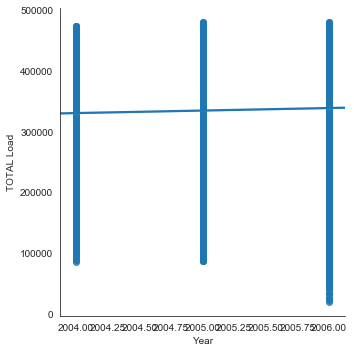

<Figure size 720x432 with 0 Axes>

In [57]:
sns.lmplot('Year',y='TOTAL Load',data=elec,palette='viridis')
plt.figure(figsize=(10,6))

In [58]:
elec.tail(1)

,TOTAL Load,AVGTEMP,AVGHUM,HOL_IND,SUNRISE,SUNSET,Minute,Day,Hour,Month,...,DATEDay,DATEDayofweek,DATEDayofyear,DATEIs_month_end,DATEIs_month_start,DATEIs_quarter_end,DATEIs_quarter_start,DATEIs_year_end,DATEIs_year_start,DATEElapsed
48189,318720.0,85.0,79,0,1900-01-02 06:18:00,1900-01-01 18:43:00,30,30,23,9,...,30,5,273,True,False,True,False,False,False,1159659000


In [17]:
type(elec['Hour'].iloc[5])

numpy.int64

In [18]:
import re

In [19]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [20]:
add_datepart(elec, 'DATE')

In [21]:
elec.head(1)

,TOTAL Load,AVGTEMP,AVGHUM,HOL_IND,SUNRISE,SUNSET,Minute,Day,Hour,Month,...,DATEDay,DATEDayofweek,DATEDayofyear,DATEIs_month_end,DATEIs_month_start,DATEIs_quarter_end,DATEIs_quarter_start,DATEIs_year_end,DATEIs_year_start,DATEElapsed
0,253080.0,68.0,55,1,1900-01-02 07:01:00,1900-01-01 18:22:00,30,1,0,1,...,1,3,1,False,True,False,True,False,True,1072917000


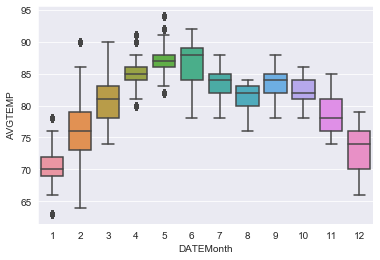

In [22]:
sns.boxplot(x="DATEMonth",y='AVGTEMP',data=elec)

In [23]:
def impute_temp(cols):
    AVGTEMP = cols[0]
    DATEMonth = cols[1]
    
    if pd.isnull(AVGTEMP):

        if DATEMonth == 1:
            return 70

        elif DATEMonth == 2:
            return 76
        elif DATEMonth == 3:
            return 81
        elif DATEMonth == 4:
            return 85
        elif DATEMonth == 5:
            return 87
        elif DATEMonth == 6:
            return 88
        elif DATEMonth == 7:
            return 84
        elif DATEMonth == 8:
            return 82
        elif DATEMonth == 9:
            return 84
        elif DATEMonth == 10:
            return 82
        elif DATEMonth ==11:
            return 78
        else:
            return 74

    else:
        return AVGTEMP

In [24]:
elec['AVGTEMP'] = elec[['AVGTEMP','DATEMonth']].apply(impute_temp,axis=1)

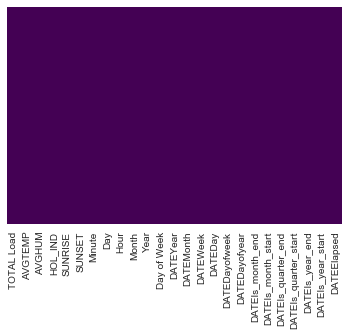

In [25]:
sns.heatmap(elec.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\sparsh\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


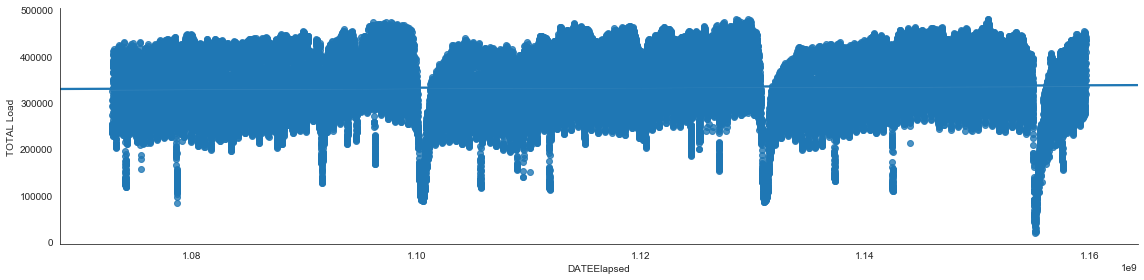

In [59]:
sns.lmplot(x='DATEElapsed',y='TOTAL Load',data=elec,size=4,aspect=4)
sns.set_style('white')

# Feature Selection

In [27]:
X_train=elec[['DATEElapsed','HOL_IND','AVGHUM','DATEDayofweek','AVGTEMP']]
y_train=elec['TOTAL Load']

In [28]:
type(elec['AVGHUM'].iloc[0])

numpy.int64

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
test=pd.read_excel("Validation Set.xls")

In [47]:
add_datepart(test, 'DATE')

In [48]:
X_test=test[['DATEElapsed','HOL_IND','AVGHUM','DATEDayofweek','AVGTEMP']]
y_test=test['TOTAL Load']

In [49]:
lin_predictions = lm.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

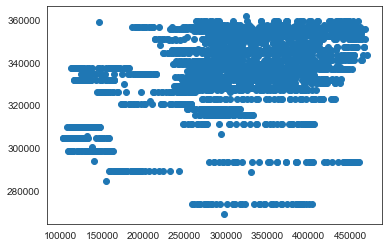

In [51]:
plt.scatter(y_test,lin_predictions)

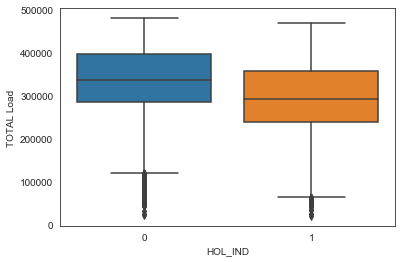

In [52]:
sns.boxplot(x="HOL_IND",y="TOTAL Load",data=elec)

In [53]:
print(mean_absolute_error(y_test,lin_predictions))

68619.37596747461


In [54]:
elec.mean()['TOTAL Load']

333667.3362772359

In [55]:
a=mean_absolute_error(y_test,lin_predictions)
b=elec.mean()['TOTAL Load']
print((1.0-(a/b))*100)

79.43479372806799


**So, a model with accuracy 79.4% has been achieved using linear regression**